In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import folium
import numpy as np
import seaborn as sns
import geopandas
import plotly.express as px

In [2]:
#Using pandas to read the csv file and encoding the file to ISO-88590-1
df = pd.read_csv('../input/forest-fires-in-brazil/amazon.csv', encoding = "ISO-8859-1")
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [3]:
#creating a dictionary with translations of months
month_map={'Janeiro': 'January', 'Fevereiro': 'February', 'Março': 'March', 'Abril': 'April', 'Maio': 'May',
          'Junho': 'June', 'Julho': 'July', 'Agosto': 'August', 'Setembro': 'September', 'Outubro': 'October',
          'Novembro': 'November', 'Dezembro': 'December'}
#mapping our translated months
df['month']=df['month'].map(month_map)
df.head()

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01


In [4]:
#Creating a pivot to get the total number of fires and the year
pivot1 = pd.pivot_table(df,values="number",index=["year"],aggfunc=np.sum)
pivot1.head()

,number
year,
1998,20013.971
1999,26882.821
2000,27351.251
2001,29071.612
2002,37390.600


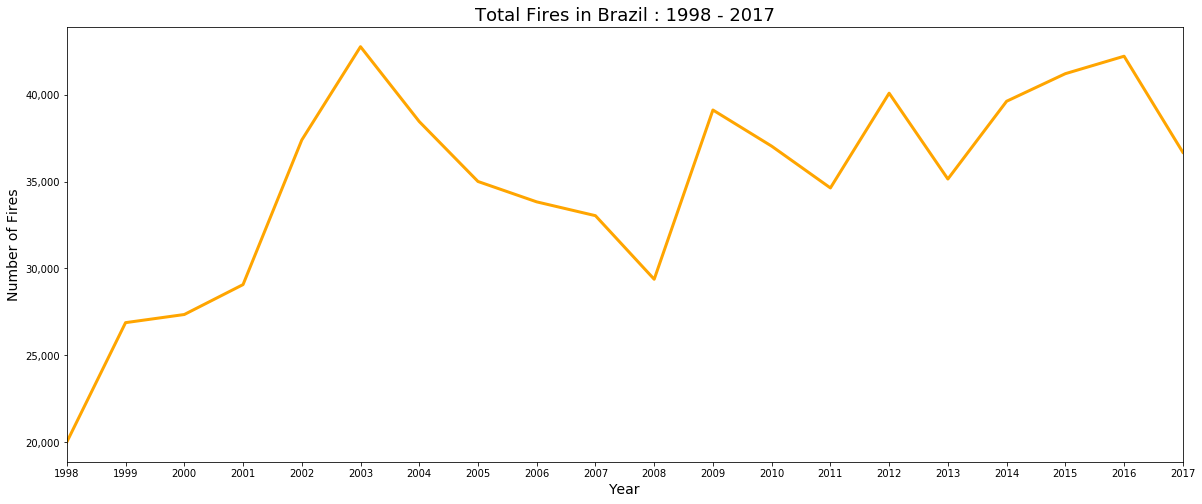

In [5]:
from matplotlib.pyplot import MaxNLocator, FuncFormatter

plt.figure(figsize=(20,8))

ax = sns.lineplot(x = pivot1.index, y = 'number', data = pivot1, estimator = 'sum', color = 'orange', lw = 3, 
                  err_style = None)

plt.title('Total Fires in Brazil : 1998 - 2017', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of Fires', fontsize = 14)

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))


In [6]:
#Creating another pivot to plot the number of fires by month
pivot2 = pd.pivot_table(df,values="number",index=["month"],aggfunc=np.sum)
pivot2.head()

,number
month,
April,28188.770
August,88050.435
December,57535.480
February,30848.050
January,47747.844


In [7]:
# Sorting by months chronologically
meses = df['month'].unique()
pivot2 = pivot2.reindex(meses)
pivot2

,number
month,
January,47747.844
February,30848.050
March,30717.405
April,28188.770
May,34731.363
June,56010.675
July,92326.113
August,88050.435
September,58578.305


Text(0.5, 1.0, 'Fire vs Month')

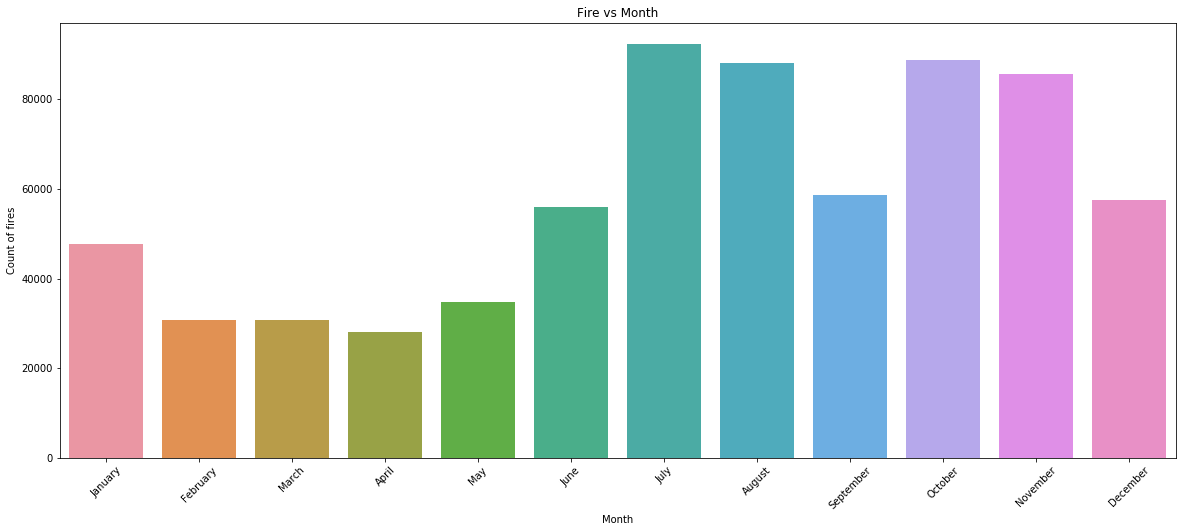

In [8]:
# Total burnings reported in Brazil from 1998 to 2017 by months
plt.figure(figsize=(20, 8))
ax = sns.barplot(x=pivot2.index, y="number", data=pivot2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel("Month")
plt.ylabel("Count of fires")
plt.title("Fire vs Month")

In [9]:
# The following analysis can be drawn from the plot:

# 1. February, March, April and May see the lowest number of forest fires
# 2. A sudden spike in June continuing the trend till November
# 3. July, August, October and November are the 4 months where maximum forest fires happen

In [10]:
#Creating another pivot to plot the fires by state
pivot3 = pd.pivot_table(df,values="number",index=["state"],aggfunc=np.sum)
pivot3.head()

,number
state,
Acre,18464.030
Alagoas,4644.000
Amapa,21831.576
Amazonas,30650.129
Bahia,44746.226


Text(0.5, 1.0, 'Total burnings reported in Brazil from 1998 to 2017 by States')

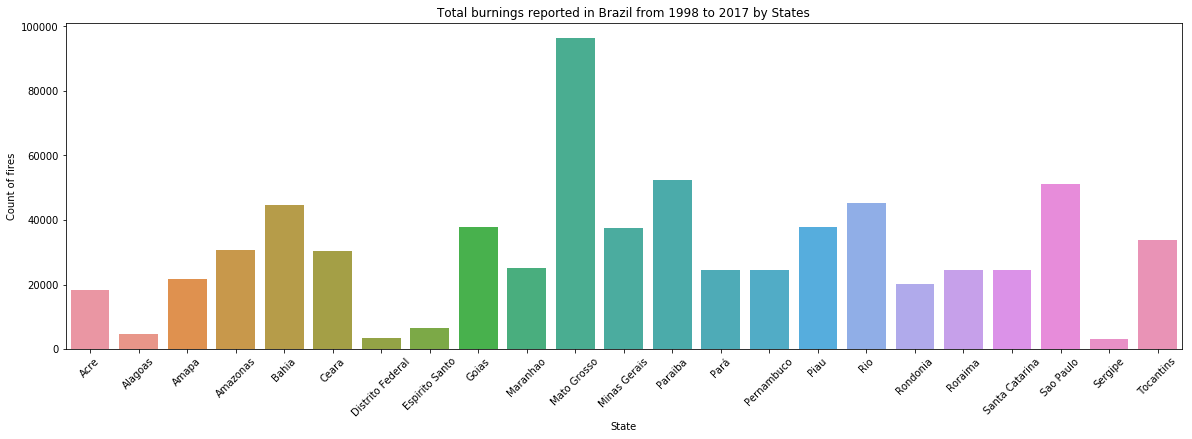

In [11]:
#Plotting the graph
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=pivot3.index, y="number", data=pivot3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel("State")
plt.ylabel("Count of fires")
plt.title("Total burnings reported in Brazil from 1998 to 2017 by States")

In [12]:
# The following analysis can be drawn from the plot:

# 1. Mato Grosso see a huge number of forest fires
# 2. Sergipe, Distrito Federal, Alagoas and Espirito Santo see the lowest number of forest fires